In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
#import csv as a pandas dataframe
training_path = "D:\OneDrive\OneDrive - University of Massachusetts Dartmouth\ECE457_Senior_Design_ECE5\CSV_Files\Training_Port1.csv"
test_path = "D:\OneDrive\OneDrive - University of Massachusetts Dartmouth\ECE457_Senior_Design_ECE5\CSV_Files\Test_Stbd1.csv"
df=pd.read_csv(training_path)
#print(df)# will print out a nice looking chart

In [3]:
df

,Ping#,Sample#,Port/Stbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
0,7,5,0,0.000061,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.040,-55.809999,0.000061,0,0,65108.40625,0.045832
1,7,6,0,0.000077,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.040,-55.809999,0.000077,0,0,65108.40625,0.057291
2,7,7,0,0.000092,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.040,-55.809999,0.000092,0,0,65108.40625,0.068749
3,7,8,0,0.000108,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.040,-55.809999,0.000108,0,0,65108.40625,0.080207
4,7,9,0,0.000123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.040,-55.809999,0.000123,0,0,65108.40625,0.091665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504452,1287,4297,0,0.065982,-28.2500,24.0000,-4.6875,41.8750,23.7500,30.8125,...,-5.6875,-2.3125,1.016235,1491.949,-82.134998,0.065982,76,206,65108.40625,49.221089
5504453,1287,4298,0,0.065998,-70.8750,26.7500,7.2500,78.1250,66.7500,30.7500,...,-43.3125,-50.6875,1.016235,1491.949,-80.939998,0.065998,84,97,65108.40625,49.232546
5504454,1287,4299,0,0.066013,-42.5625,15.3750,14.5625,48.1875,42.7500,7.6250,...,-46.6875,-43.5000,1.016235,1491.949,-80.624998,0.066013,96,32,65108.40625,49.244004
5504455,1287,4300,0,0.066028,35.9375,-15.7500,13.1875,-39.5000,-40.5625,-27.1250,...,1.4375,16.5625,1.016235,1491.949,-80.924998,0.066028,90,48,65108.40625,49.255461


In [ ]:
abstest = df.I1.abs()
maxtest = abstest.max()
maxtest

In [4]:
feature_column = []

## Find all the max values of each IQ column
I1abs = df.I1.abs()
I1max = I1abs.max()
I2abs = df.I2.abs()
I2max = I2abs.max()
I3abs = df.I3.abs()
I3max = I3abs.max()
I4abs = df.I4.abs()
I4max = I4abs.max()
I5abs = df.I5.abs()
I5max = I5abs.max()
I6abs = df.I6.abs()
I6max = I6abs.max()
I7abs = df.I7.abs()
I7max = I7abs.max()
I8abs = df.I8.abs()
I8max = I8abs.max()
I9abs = df.I9.abs()
I9max = I9abs.max()
I10abs = df.I10.abs()
I10max = I10abs.max()
Q1abs = df.Q1.abs()
Q1max = Q1abs.max()
Q2abs = df.Q2.abs()
Q2max = Q2abs.max()
Q3abs = df.Q3.abs()
Q3max = Q3abs.max()
Q4abs = df.Q4.abs()
Q4max = Q4abs.max()
Q5abs = df.Q5.abs()
Q5max = Q5abs.max()
Q6abs = df.Q6.abs()
Q6max = Q6abs.max()
Q7abs = df.Q6.abs()
Q7max = Q7abs.max()
Q8abs = df.Q8.abs()
Q8max = Q8abs.max()
Q9abs = df.Q9.abs()
Q9max = Q9abs.max()
Q10abs = df.Q10.abs()
Q10max = Q10abs.max()

#df.SampleTimeDelay = df.SampleTimeDelay/TWTTmax
df.I1 = df.I1/I1max
I1=tf.feature_column.numeric_column("I1")#names the column in the list
feature_column.append(I1)
#I1list = []
#I1list.append(I1) #append the column to the list
#feature_column.append(scalerIQ(I1list))

df.I2 = df.I2/I2max
I2=tf.feature_column.numeric_column("I2")
feature_column.append(I2) #append the column to the list

df.I3 = df.I3/I3max
I3=tf.feature_column.numeric_column("I3")
feature_column.append(I3) #append the column to the list

df.I4 = df.I4/I4max
I4=tf.feature_column.numeric_column("I4")
feature_column.append(I4) #append the column to the list

df.I5 = df.I5/I5max
I5=tf.feature_column.numeric_column("I5")
feature_column.append(I5) #append the column to the list

df.I6 = df.I6/I6max
I6=tf.feature_column.numeric_column("I6")
feature_column.append(I6) #append the column to the list

df.I7 = df.I7/I7max
I7=tf.feature_column.numeric_column("I7")
feature_column.append(I7) #append the column to the list

df.I8 = df.I8/I8max
I8=tf.feature_column.numeric_column("I8")
feature_column.append(I8) #append the column to the list

df.I9 = df.I9/I9max
I9=tf.feature_column.numeric_column("I9")
feature_column.append(I9) #append the column to the list

df.I10 = df.I10/I10max
I10=tf.feature_column.numeric_column("I0")
feature_column.append(I10) #append the column to the list

##########################################################################
df.Q1 = df.Q1/Q1max
Q1=tf.feature_column.numeric_column("Q1")#names the column in the list
feature_column.append(Q1) #append the column to the list

df.Q2 = df.Q2/Q2max
Q2=tf.feature_column.numeric_column("Q2")
feature_column.append(Q2) #append the column to the list

df.Q3 = df.Q3/Q3max
Q3=tf.feature_column.numeric_column("Q3")
feature_column.append(Q3) #append the column to the list

df.Q4 = df.Q4/Q4max
Q4=tf.feature_column.numeric_column("Q4")
feature_column.append(Q4) #append the column to the list

df.Q5 = df.Q5/Q5max
Q5=tf.feature_column.numeric_column("Q5")
feature_column.append(Q5) #append the column to the list

df.Q6 = df.Q6/Q6max
Q6=tf.feature_column.numeric_column("Q6")
feature_column.append(Q6) #append the column to the list

df.Q7 = df.Q7/Q7max
Q7=tf.feature_column.numeric_column("Q7")
feature_column.append(Q7) #append the column to the list

df.Q8 = df.Q8/Q8max
Q8=tf.feature_column.numeric_column("Q8")
feature_column.append(Q8) #append the column to the list

df.Q9 = df.Q9/Q9max
Q9=tf.feature_column.numeric_column("Q9")
feature_column.append(Q9) #append the column to the list

df.Q10 = df.Q10/Q10max
Q10=tf.feature_column.numeric_column("Q10")
feature_column.append(Q10) #append the column to the list

#########################################################################################
STDmax=df.SampleTimeDelay.max()
df.SampleTimeDelay = df.SampleTimeDelay/STDmax
STD=tf.feature_column.numeric_column("SampleTimeDelay")
#TWTT /= TWTTmax
feature_column.append(STD)



#########################################################################################
label_column = []
DOA = tf.feature_column.numeric_column("DOA")
label_column.append(DOA)


In [20]:
inputdf = df.iloc[0:40000,3:24]
df.DOA = df.DOA.clip(-90)
DOAabs = df.DOA.abs()
DOAmax = DOAabs.max()

df.DOA = df.DOA/DOAmax

outputdf = df.DOA[0:40000]

In [21]:
inputdf

,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,I4,Q4,I5,...,I6,Q6,I7,Q7,I8,Q8,I9,Q9,I10,Q10
0,0.000930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.308372,-0.007210,0.079432,-0.018667,0.060819,-0.056710,0.068203,-0.038397,0.074728,-0.067047,...,-0.066711,0.054344,-0.075239,0.036122,-0.089947,0.029283,-0.080399,0.023345,-0.075830,0.001933
39996,0.308605,-0.009942,0.050176,-0.038986,0.045925,-0.051816,0.058821,-0.045441,0.046638,-0.071489,...,-0.058117,0.030743,-0.079174,0.012844,-0.079215,0.014485,-0.074659,-0.001841,-0.065022,-0.011708
39997,0.308837,-0.056165,-0.031069,-0.110406,-0.014986,-0.064959,-0.025086,-0.069898,-0.058241,-0.071791,...,-0.044642,-0.081501,-0.071683,-0.071126,-0.022769,-0.065157,-0.038625,-0.092006,-0.013367,-0.073973
39998,0.309070,-0.051940,-0.031198,-0.081652,-0.025836,-0.046559,-0.043192,-0.043175,-0.062842,-0.043419,...,-0.023369,-0.076035,-0.041715,-0.065072,0.001421,-0.062161,-0.012482,-0.080962,0.003801,-0.063806


In [22]:
outputdf

0       -0.620111
1       -0.620111
2       -0.620111
3       -0.620111
4       -0.620111
           ...   
39995   -0.589722
39996   -0.585333
39997   -0.583944
39998   -0.597111
39999   -0.591389
Name: DOA, Length: 40000, dtype: float64

In [23]:
DOAmax

1.0

In [ ]:
#convert the list into a layer.
fp_feature_layer=tf.keras.layers.DenseFeatures(feature_column)

# define hyperparamters
learning_Rate=0.3   #
epochs=10           #
batch_size=30       #
label_name="DOA" #here we would put whatever the header is in the csv

In [24]:
C = 10
Gamma = 0.1
svr_rbf = SVR(kernel= 'rbf', C= C, gamma= Gamma, verbose=True)


In [25]:
svr_rbf = svr_rbf.fit(inputdf, outputdf)

[LibSVM]

In [26]:
X = df.iloc[0:40000,3:24]
Xsamps = df.iloc[0:40000, 1]
Ytrue = df.DOA[00000:40000]
Yout = svr_rbf.predict(X)


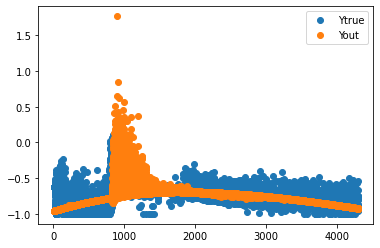

In [27]:
plt.figure()
plt.plot(Xsamps, DOAmax*Ytrue, 'o')
plt.plot(Xsamps, DOAmax*Yout, 'o')

plt.legend(['Ytrue', 'Yout'])
plt.show()

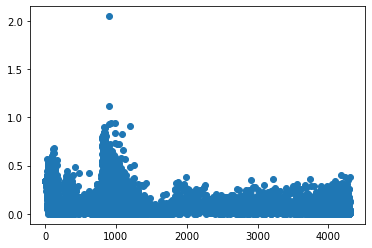

In [28]:
plt.figure()
plt.plot(Xsamps, DOAmax*abs(Ytrue-Yout), 'o')
plt.show()

In [ ]:
def create_model(myLearning_rate,feature_layer):
	# simple linear regressor - going to have to change to SVR
	model=tf.keras.models.sequential()
	model.add(feature_layer)
	
	#add one linear layer to the model to make a linear regressor
	model.add(tf.keras.layers.dense(units=1,input_shape=(num1, num2)))		#,#)))
														#what are num1 and num2?
	#construct the layers into something tensor flow can execute
	model.compile(optimize=tf.keras.optimizers.RMSprop(lr=myLearning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
	return model

In [ ]:
def train_model(model,dataset,epochs,batch_size,label_name):
	#Feed a data set in the model in order to train items
	features={name:np.array(value)for name, value in dataset.items()}
	label=np.array(features.pop(label_name))
	history= model.fit(x=features,y=label,batch_size=batch_size,epochs=epochs,shuffle=true)
	
	#the list is stored seperately
	
	epochs=history.epochs
	
	#isolate the RMS error for each epochs
	hist=pd.DataFrame(history.history)
	rmse=hist["rout mean_squared_error"]
	
	return epochs,rmse

In [ ]:
def plot_the_loss_curve(epochs, rmse):
	#plot loss v.s. epochs
	
	plt.figure()
	plt.xlabel("Epoch")
	plt.ylabel("RMS Error")
	
	plt.plot(epochs,rmse,label="loss")
	plt.legend()
	plt.ylim([rmse.min()*0.94,rmse.max()*1.05])
	plt.show
	
	return

In [ ]:
#create_model
my_model=create_model(learning_Rate,fp.feature_layer)

In [ ]:
#train model
epochs,rmse=train_model(my_model,train_df,epochs,batch_size,label_name)

In [ ]:
#plot the loss curve
plot_the_loss_curve(epochs,rmse)

In [ ]:
#test the model
test_features={name.np.array(value)for name, value in test_df.items()}
test_label=np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features,y=test_label,batch_size=batch_size)